<a href="https://colab.research.google.com/github/lauragonzaga/MVP-Representatividade-Feminina-no-Cinema/blob/main/MVP_Representatividade_Feminina_no_Cinema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Análise de Dados e Boas Práticas

**Aluna:** Laura Cardoso Gonzaga

**Matrícula:** 4052025001151

**Dataset:** [Movie Industry](https://www.kaggle.com/datasets/danielgrijalvas/movies/data)

# Descrição do problema

Este projeto investiga desigualdades de gênero na indústria cinematográfica, com foco na presença de mulheres em cargos-chave como direção, roteiro e protagonismo. A análise busca entender se há diferenças de representatividade nesses papéis e como isso se relaciona com indicadores de bilheteria e avaliação no IMDb.


## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

* A presença feminina na direção e no roteiro é realmente escassa entre os filmes que alcançam maior visibilidade do público?

* Os filmes populares têm, em sua maioria, protagonistas masculinos? As histórias mais contadas ainda são, predominantemente, sobre homens e feitas por homens?

* A presença de mulheres em cargos-chave do cinema tem crescido ao longo dos anos?

* Há alguma relação entre a avaliação do filme no IMdB e sua bilheteria? Os filmes dirigidos por mulheres tendem alcançar piores notas e bilheterias menores?


## Tipo de Problema

Embora esse trabalho não envolva construção de modelo preditivo, é possível afirmar que este é um problema de **classificação supervisionada**, pois foi construído um rótulo para os dados.

Ao final do projeto, criamos uma variável-alvo (*direcao_feminina*) que indica se um filme foi dirigido por uma mulher (1) ou não (0). Dessa forma, poderíamos usar esse rótulo de dados para prever a probabilidade de um filme ter uma diretora mulher a partir de outras variáveis como gênero, ano ou país.

## Seleção de Dados

O conjunto de dados analisado, disponível no Kaggle, foi coletado a partir de um script Python que utilizou a ferramenta de busca avançada do IMdB. A seleção de filmes é baseada na popularidade do filme na plataforma, o que introduz um claro viés geográfico em favor de produções estadunidenses. Esse fenômeno pode ser explicado pela hegemonia cultural de Hollywood e pela predominância de usuários anglófonos no site.

Além disso, gerei um conjunto de dados externo que indica o gênero (feminino ou masculino) de todos os profissionais presentes no dataset. Este foi derivado do dataset original, do qual gerei um dataframe contendo todos os nomes únicos das colunas *director*, *writer* e *star* e uma coluna de gênero inicialmente vazia. Os dados foram posteriormente preenchidos usando ChatGPT, que se mostrou ser a opção mais eficaz de identificar o gênero da pessoa sem erros.


## Atributos do Dataset

Há 6.820 filmes no dataset lançados dentro do período de 1986 a 2016. Foram selecionados 220 filmes por ano por ordem de popularidade.

Seus atributos são:





*   ***name*** (nome do filme)
*   ***rating*** (classificação indicativa)
*   ***genre*** (gênero do filme)
*   ***year*** (ano de lançamento)
*   ***released*** (data de lançamento)
*   ***score*** (avaliação média do IMdB)
*   ***votes*** (número de votos no IMdB)
*   ***director*** (nome do diretor)
*   ***writer*** (nome do roteirista)
*   ***star*** (nome do ator protagonista)
*   ***country*** (país de origem)
*   ***budget*** (orçamento do filme)
*   ***gross*** (receita do filme)
*   ***company*** (nome da produtora)
*   ***runtime*** (tempo de duração em minutos

&nbsp;

---
&nbsp;



O conjunto de dados *nomes_com_genero* têm apenas dois atributos:



*   ***nome*** (nome do profissional)
*   ***genero*** (gênero com o qual a pessoa se identifica)

&nbsp;


*Observação: Esse dataset não inclui registros de pessoas que se identificam como não binárias. Os valores de gênero estão limitados a F (feminino) e M (masculino), considerando o gênero com o qual a pessoa se identifica, inclusive em casos de pessoas transgênero.*








# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carrega dataset principal

df = pd.read_csv('https://raw.githubusercontent.com/lauragonzaga/MVP-Analise-de-Dados-e-Boas-Praticas/refs/heads/main/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
# Carrega dataset que mapeia o gênero da pessoa (Feminino ou Masculino)

nomes_com_genero = pd.read_csv('https://raw.githubusercontent.com/lauragonzaga/MVP-Analise-de-Dados-e-Boas-Praticas/refs/heads/main/nomes_com_genero.csv')

nomes_com_genero = nomes_com_genero.drop(columns=['Unnamed: 0'])
nomes_com_genero.head()

,nome,genero
0,Oprah Winfrey,F
1,Teri Garr,F
2,Evan Rachel Wood,F
3,Rooney Mara,F
4,Eva Green,F


# Pré-processamento

O pré-processamento é uma etapa essencial em qualquer projeto de Ciência de Dados, pois é nesse momento que os dados são preparados e organizados para as etapas de análise e modelagem.

## Limpeza de dados

A primeira técnica de pré-processamento é a limpeza de dados, fundamental para trabalhar com dados consistentes.

### Remoção de dados duplicados

No caso desse dataset, não há duplicatas.

In [6]:
df.duplicated().sum()

np.int64(0)

### Tradução

Traduzimos os nomes de colunas e categorias para o português para tornar a análise mais consistente com a comunicação da disciplina.

In [7]:
# Renomea as colunas

df = df.rename(columns= {
                    "name": "filme",
                    "rating": "classificacao_indicativa",
                    "genre": "genero_filme",
                    "year": "ano",
                    "released": "data_lancamento",
                    "score": "nota_imdb",
                    "votes": "numero_votos",
                    "director": "diretor",
                    "writer": "roteirista",
                    "star": "protagonista",
                    "country": "pais",
                    "budget": "orcamento",
                    "gross": "bilheteria",
                    "company": "produtora",
                    "runtime": "duracao_min"
                })

In [8]:
# Traduz nomes dos países para o português

traducao_paises = {
    'United Kingdom': 'Reino Unido',
    'United States': 'Estados Unidos',
    'South Africa': 'África do Sul',
    'West Germany': 'Alemanha Ocidental',
    'Canada': 'Canadá',
    'Australia': 'Austrália',
    'Libya': 'Líbia',
    'Italy': 'Itália',
    'Soviet Union': 'União Soviética',
    'France': 'França',
    'Hong Kong': 'Hong Kong',
    'South Korea': 'Coreia do Sul',
    'Sweden': 'Suécia',
    'Spain': 'Espanha',
    'Mexico': 'México',
    'Switzerland': 'Suíça',
    'Netherlands': 'Países Baixos',
    'New Zealand': 'Nova Zelândia',
    'Philippines': 'Filipinas',
    'Israel': 'Israel',
    'Japan': 'Japão',
    'Hungary': 'Hungria',
    'Brazil': 'Brasil',
    'Yugoslavia': 'Iugoslávia',
    'Argentina': 'Argentina',
    'Taiwan': 'Taiwan',
    'Ireland': 'Irlanda',
    'Denmark': 'Dinamarca',
    'Germany': 'Alemanha',
    'Iran': 'Irã',
    'China': 'China',
    'Belgium': 'Bélgica',
    'Austria': 'Áustria',
    'Portugal': 'Portugal',
    'Vietnam': 'Vietnã',
    'Republic of Macedonia': 'Macedônia do Norte',
    'Russia': 'Rússia',
    'Federal Republic of Yugoslavia': 'Iugoslávia (República Federal)',
    'Greece': 'Grécia',
    'Czech Republic': 'República Tcheca',
    'Norway': 'Noruega',
    'India': 'Índia',
    'Jamaica': 'Jamaica',
    'Aruba': 'Aruba',
    'Thailand': 'Tailândia',
    'Colombia': 'Colômbia',
    'Romania': 'Romênia',
    'United Arab Emirates': 'Emirados Árabes Unidos',
    'Indonesia': 'Indonésia',
    'Turkey': 'Turquia',
    'Serbia': 'Sérvia',
    'Poland': 'Polônia',
    'Kenya': 'Quênia',
    'Finland': 'Finlândia',
    'Iceland': 'Islândia',
    'Chile': 'Chile',
    'Panama': 'Panamá',
    'Malta': 'Malta',
    'Lebanon': 'Líbano'
}

df['pais'] = df['pais'].map(traducao_paises)

In [9]:
# Traduz gêneros de filme para o português

traducao_generos = {
    'Action': 'Ação',
    'Adventure': 'Aventura',
    'Animation': 'Animação',
    'Biography': 'Biografia',
    'Comedy': 'Comédia',
    'Crime': 'Crime',
    'Documentary': 'Documentário',
    'Drama': 'Drama',
    'Family': 'Família',
    'Fantasy': 'Fantasia',
    'Horror': 'Terror',
    'Music': 'Música',
    'Musical': 'Musical',
    'Western': 'Faroeste',
    'Thriller': 'Suspense',
    'Mystery': 'Mistério',
    'Sci-Fi': 'Ficção Científica',
    'Sport': 'Esporte',
    'Romance': 'Romance',
    'History': 'História'}


df['genero_filme'] = df['genero_filme'].map(traducao_generos)

### Tratamento de valores nulos

O conjunto de dados apresenta alguns dados nulos. Aqui vão algumas considerações a respeito do tratamento:


*   Todos os nulos em país eram de filmes estadunidenses, então preenchi com o dado correto.

*   Alguns filmes tinham "Director" ou "Directors" no campo diretor, possivelmente por erro de scraping. Transformei esses casos em NA e os removi em seguida.

*   Também removi os filmes sem informação de protagonista e roteirista, visto que estes são cruciais para minha análise.

*   No total foram 35 dados removidos, o que representa apenas 0,46% do dataset.

*  A coluna bilheteria possui cerca de 2,6% de valores nulos. Como esta não será usada na modelagem, apenas em estatísticas descritivas pontuais, esses registros foram mantidos para não introduzir viés ou ruído.








In [10]:
# Conta valores nulos

df.isna().sum().sort_values(ascending=False)

,0
orcamento,2171
bilheteria,189
classificacao_indicativa,77
produtora,17
duracao_min,4
nota_imdb,3
numero_votos,3
pais,3
roteirista,3
data_lancamento,2


In [11]:
# Seleciona linhas onde o país está nulo

df[df['pais'].isna()]

,filme,classificacao_indicativa,genero_filme,ano,data_lancamento,nota_imdb,numero_votos,diretor,roteirista,protagonista,pais,orcamento,bilheteria,produtora,duracao_min
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
7615,Clinton Road,NaN,Terror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [12]:
# Inserir país onde está NA

df['pais'] = df['pais'].fillna('Estados Unidos')

In [13]:
# Substitui valores errados na coluna 'diretor' por NA

df['diretor'] = df['diretor'].replace(['Directors', 'Director'], pd.NA)

In [14]:
# Remove valores nulos

colunas_pessoas = ['diretor', 'roteirista', 'protagonista']
df = df.dropna(subset = colunas_pessoas)

### Transformação logarítmica

A variável bilheteria possui muitos outliers e forte assimetria à direita, o que pode distorcer visualizações e medidas estatísticas. Para lidar com isso, optamos por fazer a transformação logarítmica em base 10, que reduz a escala e torna a distribuição mais próxima da normal. Não há valores 0 na coluna, então não há necessidade de substituição.

In [15]:
# Aplica transformação

df['bilheteria_log'] = np.log10(df['bilheteria'])

### Redução de dimensionalidade

A seleção de características (feature selection) consiste em remover colunas não relevantes ou redundantes.

Nessa etapa, removemos as colunas que não agregaram valor à análise e/ou possuem muitos valores nulos.

In [16]:
df = df.drop(columns=['data_lancamento', 'classificacao_indicativa', 'orcamento', 'produtora'])

###  Criação de recursos

Criação de recursos (ou *feature engineering*) consiste em criar, a partir dos atributos originais, um conjunto de atributos com informações relevantes.

Um método para criar recursos é o enriquecimento de dados através de informações externas ou contextuais.

Nesse caso, vamos agregar os dados de gênero para cada coluna de pessoas no dataset utilizando o merge.


In [17]:
# Cria colunas de gênero para cada coluna de pessoa


colunas_genero = ["genero_diretor", 'genero_roteirista', "genero_protagonista"]

for col_nome, col_genero in zip(colunas_pessoas, colunas_genero):
    df = df.merge(
        nomes_com_genero,
        left_on=col_nome,
        right_on="nome",
        how="left"
    ).rename(columns={"genero": col_genero}).drop(columns=["nome"])

In [18]:
df[colunas_pessoas+colunas_genero].sample(10)

,diretor,roteirista,protagonista,genero_diretor,genero_roteirista,genero_protagonista
5237,Andrew Stanton,Andrew Stanton,Ben Burtt,M,M,M
4695,Neil Jordan,Neil Jordan,Cillian Murphy,M,M,M
493,Jim Abrahams,Jim Abrahams,Val Kilmer,M,M,M
6263,Roland Emmerich,James Vanderbilt,Channing Tatum,M,M,M
6895,Kelly Fremon Craig,Kelly Fremon Craig,Hailee Steinfeld,F,F,F
2716,Carl Franklin,Walter Mosley,Denzel Washington,M,M,M
7274,Debra Granik,Debra Granik,Thomasin McKenzie,F,F,F
5387,Darnell Martin,Darnell Martin,Adrien Brody,F,F,M
3848,Garry Marshall,Meg Cabot,Julie Andrews,M,F,F
856,Michael Ritchie,Dennis Feldman,Eddie Murphy,M,M,M


In [19]:
# Confere se algum nome não ficou mapeado
df[colunas_genero].isna().sum()

,0
genero_diretor,0
genero_roteirista,0
genero_protagonista,0


Também vamos criar duas novas colunas derivadas de colunas pré-existentes. Essa técnica é conhecida como construção de recursos.

Primeiro, criamos a coluna *década* a partir do *ano*, o que permite observar tendências temporais com menor flutuação de ano a ano. Além disso, criamos uma coluna *continente* derivada da coluna *país*.


In [20]:
# Cria coluna década

df['decada'] = (df['ano'] // 10) * 10
df['decada'] = df['decada'].astype(str)

In [21]:
df['decada'].value_counts().sort_index()

,count
decada,
1980,1632
1990,1992
2000,1995
2010,1991
2020,24


In [22]:
# Removendo filmes da década de 2020 por falta de dados

df = df[df['ano'] < 2020]

In [23]:
pais_para_continente = {
    'Reino Unido': 'Europa',
    'Estados Unidos': 'América do Norte',
    'África do Sul': 'África',
    'Alemanha Ocidental': 'Europa',
    'Canadá': 'América do Norte',
    'Austrália': 'Oceania',
    'Líbia': 'África',
    'Itália': 'Europa',
    'União Soviética': 'Europa/Ásia',
    'França': 'Europa',
    'Hong Kong': 'Ásia',
    'Coreia do Sul': 'Ásia',
    'Suécia': 'Europa',
    'Espanha': 'Europa',
    'México': 'América do Norte',
    'Suíça': 'Europa',
    'Países Baixos': 'Europa',
    'Nova Zelândia': 'Oceania',
    'Filipinas': 'Ásia',
    'Israel': 'Ásia',
    'Japão': 'Ásia',
    'Hungria': 'Europa',
    'Brasil': 'América do Sul',
    'Iugoslávia': 'Europa',
    'Argentina': 'América do Sul',
    'Taiwan': 'Ásia',
    'Irlanda': 'Europa',
    'Dinamarca': 'Europa',
    'Alemanha': 'Europa',
    'Irã': 'Ásia',
    'China': 'Ásia',
    'Bélgica': 'Europa',
    'Áustria': 'Europa',
    'Portugal': 'Europa',
    'Vietnã': 'Ásia',
    'Macedônia do Norte': 'Europa',
    'Rússia': 'Europa/Ásia',
    'Iugoslávia (República Federal)': 'Europa',
    'Grécia': 'Europa',
    'República Tcheca': 'Europa',
    'Noruega': 'Europa',
    'Índia': 'Ásia',
    'Jamaica': 'América do Norte',
    'Aruba': 'América do Norte',
    'Tailândia': 'Ásia',
    'Colômbia': 'América do Sul',
    'Romênia': 'Europa',
    'Emirados Árabes Unidos': 'Ásia',
    'Indonésia': 'Ásia',
    'Turquia': 'Europa/Ásia',
    'Sérvia': 'Europa',
    'Polônia': 'Europa',
    'Quênia': 'África',
    'Finlândia': 'Europa',
    'Islândia': 'Europa',
    'Chile': 'América do Sul',
    'Panamá': 'América do Norte',
    'Malta': 'Europa',
    'Líbano': 'Ásia'
}

df['continente'] = df['pais'].map(pais_para_continente)

### Conversão de tipos de dados

A coluna "ano" é um dado categórico, apesar de ser numérico. Vamos converter para uma coluna tipo objeto para facilitar a análise e plotagem de gráficos.

In [24]:
df['ano'] = df['ano'].astype(str)

# Análise de Dados

A etapa de Análise Exploratória de Dados (EDA) visa
entender a distribuição, relações e características das variáveis.


### Total e tipos de instâncias e colunas

In [25]:
print(f"Total de instâncias: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")
print('\n')
print(df.info())

Total de instâncias: 7610
Total de colunas: 17


<class 'pandas.core.frame.DataFrame'>
Index: 7610 entries, 0 to 7609
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   filme                7610 non-null   object 
 1   genero_filme         7610 non-null   object 
 2   ano                  7610 non-null   object 
 3   nota_imdb            7610 non-null   float64
 4   numero_votos         7610 non-null   float64
 5   diretor              7610 non-null   object 
 6   roteirista           7610 non-null   object 
 7   protagonista         7610 non-null   object 
 8   pais                 7610 non-null   object 
 9   bilheteria           7433 non-null   float64
 10  duracao_min          7607 non-null   float64
 11  bilheteria_log       7433 non-null   float64
 12  genero_diretor       7610 non-null   object 
 13  genero_roteirista    7610 non-null   object 
 14  genero_protagonista  7610 non-null   object 

### Estatísticas descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [26]:
df.describe().applymap(lambda x: '{:.2f}'.format(x))

,nota_imdb,numero_votos,bilheteria,duracao_min,bilheteria_log
count,7610.00,7610.00,7433.00,7607.00,7433.00
mean,6.39,88374.50,78381096.18,107.30,7.20
std,0.97,163746.12,165792482.62,18.53,0.96
min,1.90,34.00,309.00,63.00,2.49
25%,5.80,9200.00,4554416.00,95.00,6.66
50%,6.50,33000.00,20208496.00,104.00,7.31
75%,7.10,93000.00,75837743.00,116.00,7.88
max,9.30,2400000.00,2847246203.00,366.00,9.45


As quatro variáveis numéricas do conjunto (*nota_imdb*, *numero_votos*, *bilheteria* e *duracao_min*) apresentam escalas e comportamentos distintos.

* *nota_imdb* possui uma distribuição concentrada, com média (6,39) próxima à mediana (6,5) e desvio padrão baixo (0,97). A maioria dos filmes está entre nota 5,8 e 7,1.

* *numero_votos* e *bilheteria* apresentam forte assimetria à direita. Ambas têm média muito maior que a mediana e valores máximos extremamente altos, indicando forte presença de outliers.

* *duracao_min* tem distribuição mais simétrica, com média de 107 minutos e pequena variação entre os quartis (Q1 = 95, Q3 = 116), o que indica uma consistência na duração média dos filmes.

### Parâmetros para criação de visualizações

Para padronizar o visual das visualizações, criamos uma paleta de cores e definimos os parâmetros do título, além do estilo dos gráficos.

In [27]:
# Define a paleta de cores
paleta = ['#72374c',
          '#965255',
          '#bc776c',
          '#daa389',
          '#869b8b',
          '#a9baab',
          '#4d316c',
          '#705a89'
]

# Define parâmetros dos títulos
param_titulo = {'weight': 'bold', 'size': 18, 'family': 'Liberation Sans'}

# Define estilo dos graficos
plt.style.use('seaborn-v0_8-darkgrid')

### Distribuição dos dados

Vamos verificar a distribuição de alguns atributos. Essa etapa nos permite visualizar se há necessidade de transformações nos dados.


In [28]:
# Cria dataframe de contagem de filmes por ano
filmes_por_ano = df['ano'].value_counts()
filmes_por_ano.sort_index(inplace=True)

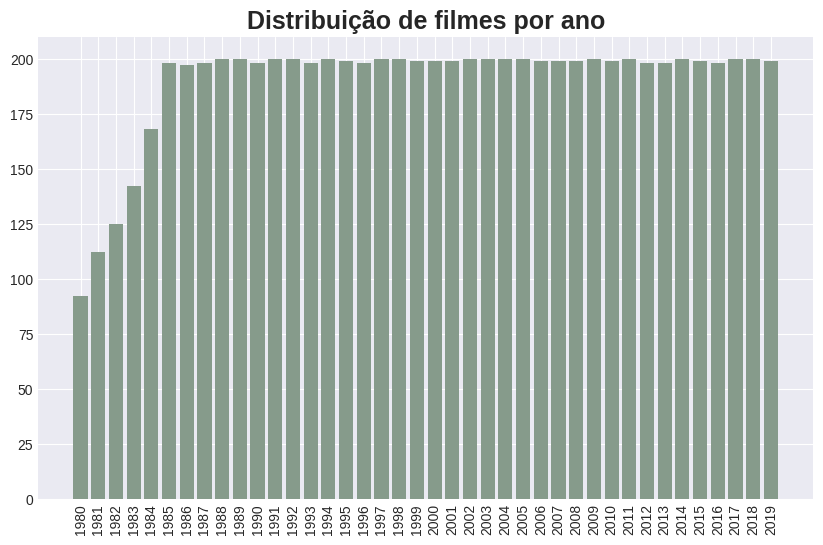

In [29]:
plt.figure(figsize=(10, 6))

# Gera gráfico de barras simples
plt.bar(filmes_por_ano.index,
        filmes_por_ano.values,
        color = paleta[4])
plt.xticks(rotation=90);
plt.title('Distribuição de filmes por ano',
          fontdict = param_titulo);

O dataset apresenta uma distribuição equilibrada ao longo dos anos, com cerca de 200 filmes por ano. Isso possibilita uma análise temporal consistente e representativa.

### Matriz de correlação

A matriz de correlação é uma visualização muito eficaz para correlação entre variáveis numéricas. Vamos conferir se há alguma relação entre a avaliação dos filmes e sua bilheteria.

In [55]:
matriz_corr = df[['nota_imdb', 'bilheteria_log']].corr()

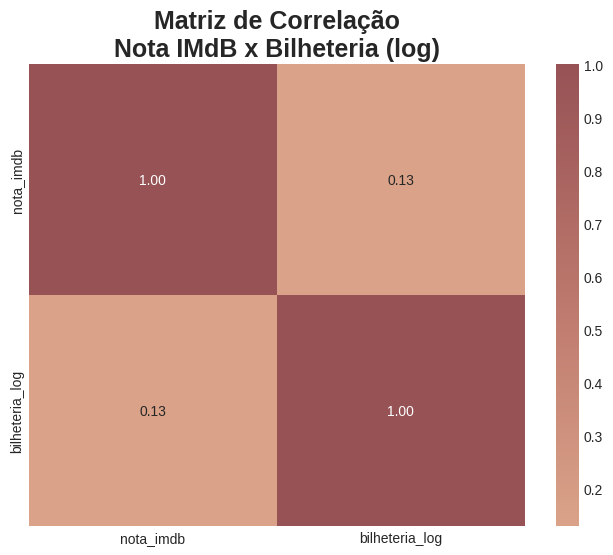

In [56]:
plt.figure(figsize=(8, 6))

sns.heatmap(matriz_corr,
            cmap = LinearSegmentedColormap.from_list('custom_cmap', paleta[3:0:-1]),
            annot=True,
            fmt=".2f")

plt.title('Matriz de Correlação\nNota IMdB x Bilheteria (log)',
          fontdict = param_titulo)
plt.show()

A partir dessa visualização, podemos concluir que não há correlação entre a avaliação do filme e sua bilheteria.

### Análise de Frequência

Nessa etapa, investigamos a frequência dos valores mais recorrentes em alguns atributos do dataset. Essa análise permite identificar padrões que podem revelar vieses nos dados.

In [31]:
# Filmes por país

df['pais'].value_counts().head(10)

,count
pais,
Estados Unidos,5436
Reino Unido,813
França,277
Canadá,187
Alemanha,117
Austrália,91
Japão,79
Índia,62
Itália,61


Este dataset apresenta um viés, pois foi coletado com base na ordem de popularidade no site IMDb. Como resultado, os filmes estadunidenses predominam nesse conjunto de dados.

Contudo, sabemos que atualmente os Estados Unidos não são o maior produtor de filmes no mundo, pois esse título pertence à Índia. Portanto, esses dados refletem principalmente o enorme poder cultural e a influência global do cinema americano, e não necessariamente a quantidade total de produções cinematográficas globais.

In [32]:
# Porcentagem de filmes por continente

df['continente'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

,proportion
continente,
América do Norte,74.22%
Europa,19.87%
Ásia,3.88%
Oceania,1.52%
América do Sul,0.22%
Europa/Ásia,0.17%
África,0.12%


A predominância da América do Norte e da Europa neste dataset reflete a forte influência cultural dessas regiões na popularidade dos filmes, enquanto as demais áreas têm menor representatividade.

In [57]:
# Cria dataset de filmes por genero

filmes_por_genero_filme = df['genero_filme'].value_counts().sort_values(ascending = True)

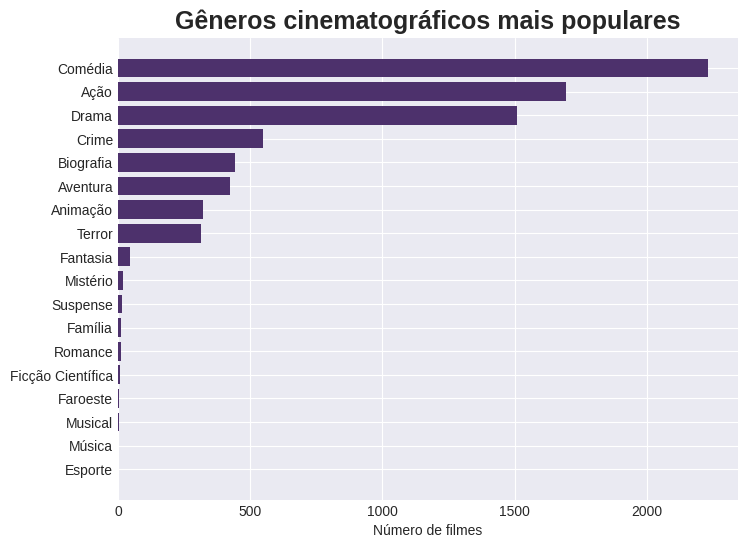

In [58]:
# Gêneros mais populares

plt.figure(figsize=(8, 6))

plt.barh(filmes_por_genero_filme.index,
        filmes_por_genero_filme.values,
        color = paleta[6])

plt.title('Gêneros cinematográficos mais populares',
          fontdict = param_titulo)
plt.xlabel('Número de filmes')
plt.ylabel('')

plt.show()

Os gêneros comédia, ação e drama predominam neste dataset, indicando uma preferência do público por esses formatos narrativos.

In [34]:
# Bilheteria por gênero cinematográfico

bilheteria_por_genero = df.groupby('genero_filme')['bilheteria'].agg(['mean', 'median', 'count']).round()
bilheteria_por_genero.columns = ['média', 'mediana', 'contagem']
bilheteria_por_genero = bilheteria_por_genero.sort_values(by = 'mediana', ascending = False)

bilheteria_por_genero.head(5)

,média,mediana,contagem
genero_filme,,,
Animação,245951614.0,141464185.0,320
Ação,145112070.0,51378531.0,1664
Aventura,108995224.0,27824368.0,418
Terror,48178549.0,20901859.0,301
Fantasia,38709329.0,19595031.0,43


Os dados revelam que, mesmo alguns gêneros terem menor predominância no dataset (como animação e fantasia), esses filmes alcançam em média os maiores números de bilheteria.

In [35]:
filmes_por_diretor = df['diretor'].value_counts()
filmes_com_diretoras_mulheres = df[df['genero_diretor'] == 'F']
filmes_por_diretora = filmes_com_diretoras_mulheres['diretor'].value_counts()


print("\nDiretores com mais filmes populares (sem filtrar por gênero):")
print(filmes_por_diretor.head(10).to_string(header = False))

print("\nDiretoras mulheres com mais filmes populares:")
print(filmes_por_diretora.head(10).to_string(header = False))




Diretores com mais filmes populares (sem filtrar por gênero):
Woody Allen          38
Clint Eastwood       31
Steven Spielberg     27
Ron Howard           24
Steven Soderbergh    23
Ridley Scott         23
Joel Schumacher      22
Barry Levinson       20
Martin Scorsese      19
Tim Burton           19

Diretoras mulheres com mais filmes populares:
Kathryn Bigelow    9
Nora Ephron        8
Betty Thomas       7
Penny Marshall     7
Martha Coolidge    7
Jane Campion       7
Amy Heckerling     7
Nancy Meyers       6
Lana Wachowski     6
Sofia Coppola      6


Os dados revelam uma disparidade significativa na representação de gênero no cinema: a lista dos 10 diretores mais presentes no dataset é exclusivamente composta por homens, com números bem maiores que as diretoras que alcançaram maior reconhecimento na indústria.

### Visualizando a desigualdade de gênero

Vamos focar agora em responder as hipóteses do problema traçadas no início do trabalho e visualizar seus resultados. Todas as análises a seguir se baseiam no gênero dos profissionais envolvidos nos filmes.

In [60]:
# Cria contagem de diretores homens e mulheres

filmes_por_genero_dir = df['genero_diretor'].value_counts()

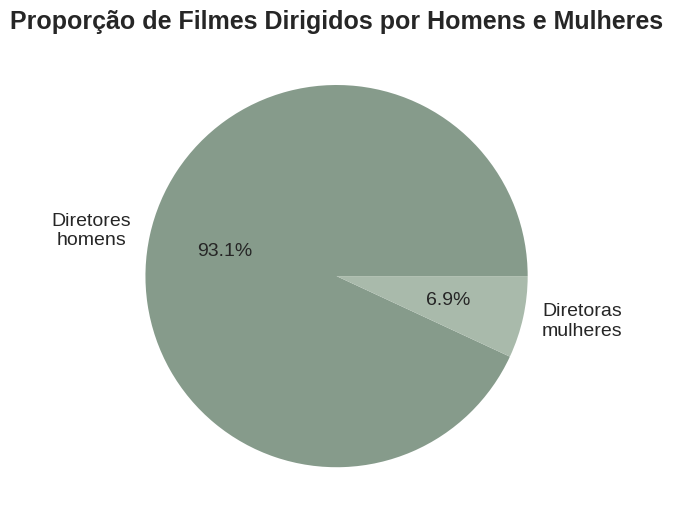

In [89]:
# Total de filmes com mulheres na direção

plt.figure(figsize=(6,6))

plt.pie(filmes_por_genero_dir,
        labels = ['Diretores\nhomens', 'Diretoras\nmulheres'],
        autopct='%1.1f%%',
        colors = paleta[4:6],
        textprops={'fontsize': 14, 'weight': 'normal', 'multialignment': 'center'})

plt.title('Proporção de Filmes Dirigidos por Homens e Mulheres',
          fontdict = param_titulo)

plt.tight_layout();

Os dados indicam que apenas 6.9% dos filmes são dirigidos por mulheres. Esse resultado é coerente com estatísticas históricas da indústria cinematográfica, onde a presença feminina em cargos de direção ainda é bastante reduzida.

Vamos ver como esses números aparecem para roteiristas e protagonistas.

In [37]:
def exibir_proporcao_genero (genero_profissional, titulo):
  """Exibe contagem e proporção de homens e mulheres em determinada função"""
  contagem = genero_profissional.value_counts()
  proporcao = genero_profissional.value_counts(normalize = True)

  print(f'\n{titulo}')
  print(f"Homens: {contagem[0]} ({(proporcao[0] * 100).round(2)}%)")
  print(f"Mulheres: {contagem[1]} ({(proporcao[1] * 100).round(2)}%)")


# Cria dataframe com todos os diretores sem repetir

df_diretores = df[['diretor', 'genero_diretor']]
df_diretores_unicos = df_diretores.drop_duplicates(subset=['diretor'])


exibir_proporcao_genero(df['genero_diretor'], 'Proporção de gênero dentre os Diretores:')
exibir_proporcao_genero(df_diretores_unicos['genero_diretor'], 'Proporção de gênero dentre os Diretores Únicos:')
exibir_proporcao_genero(df['genero_roteirista'], 'Proporção de gênero dentre os Roteiristas:')
exibir_proporcao_genero(df['genero_protagonista'], 'Proporção de gênero dentre os Protagonistas:')


Proporção de gênero dentre os Diretores:
Homens: 7083 (93.07%)
Mulheres: 527 (6.93%)

Proporção de gênero dentre os Diretores Únicos:
Homens: 2632 (89.89%)
Mulheres: 296 (10.11%)

Proporção de gênero dentre os Roteiristas:
Homens: 6604 (86.78%)
Mulheres: 1006 (13.22%)

Proporção de gênero dentre os Protagonistas:
Homens: 5543 (72.84%)
Mulheres: 2067 (27.16%)


Como alguns diretores aparecem mais de uma vez no dataset, construí um dataframe com nomes únicos para evitar distorções causadas por profissionais com múltiplas obras. A partir disso, calculei a proporção de homens e mulheres em todas as categorias (diretor, roteiro e protagonista).

Os resultados evidenciam uma sub-representação sistemática de mulheres em todas as funções analisadas.

In [38]:
# Conta todas as combinações

df[colunas_genero].value_counts(normalize = True).apply(lambda x: f"{x:.2%}")

genero_diretor  genero_roteirista  genero_protagonista
M               M                  M                      66.57%
                                   F                      17.67%
                F                  F                       5.16%
                                   M                       3.67%
F               F                  F                       3.15%
                M                  M                       1.37%
                F                  M                       1.24%
                M                  F                       1.17%
Name: proportion, dtype: object

Analisando todas as combinações possíveis de gênero dos profissionais nessas três categorias, observamos como a maioria dos filmes é feito por homens e tem um protagonista masculino.

In [ ]:
# Calcula total de filmes por década

total_por_decada = df['decada'].value_counts().sort_index()


# Cria dataframes filtrados

filmes_com_roteiristas_mulheres = df[df['genero_roteirista'] == 'F']
filmes_com_protagonistas_mulheres = df[df['genero_protagonista'] == 'F']


# Contagem por década para cada grupo

cont_diretoras = filmes_com_diretoras_mulheres['decada'].value_counts().sort_index()
cont_roteiristas = filmes_com_roteiristas_mulheres['decada'].value_counts().sort_index()
cont_protagonistas = filmes_com_protagonistas_mulheres['decada'].value_counts().sort_index()


# Calcula proporção por década para cada grupo

proporcao_diretoras = cont_diretoras / total_por_decada * 100
proporcao_roteiristas = cont_roteiristas / total_por_decada * 100
proporcao_protagonistas = cont_protagonistas / total_por_decada * 100

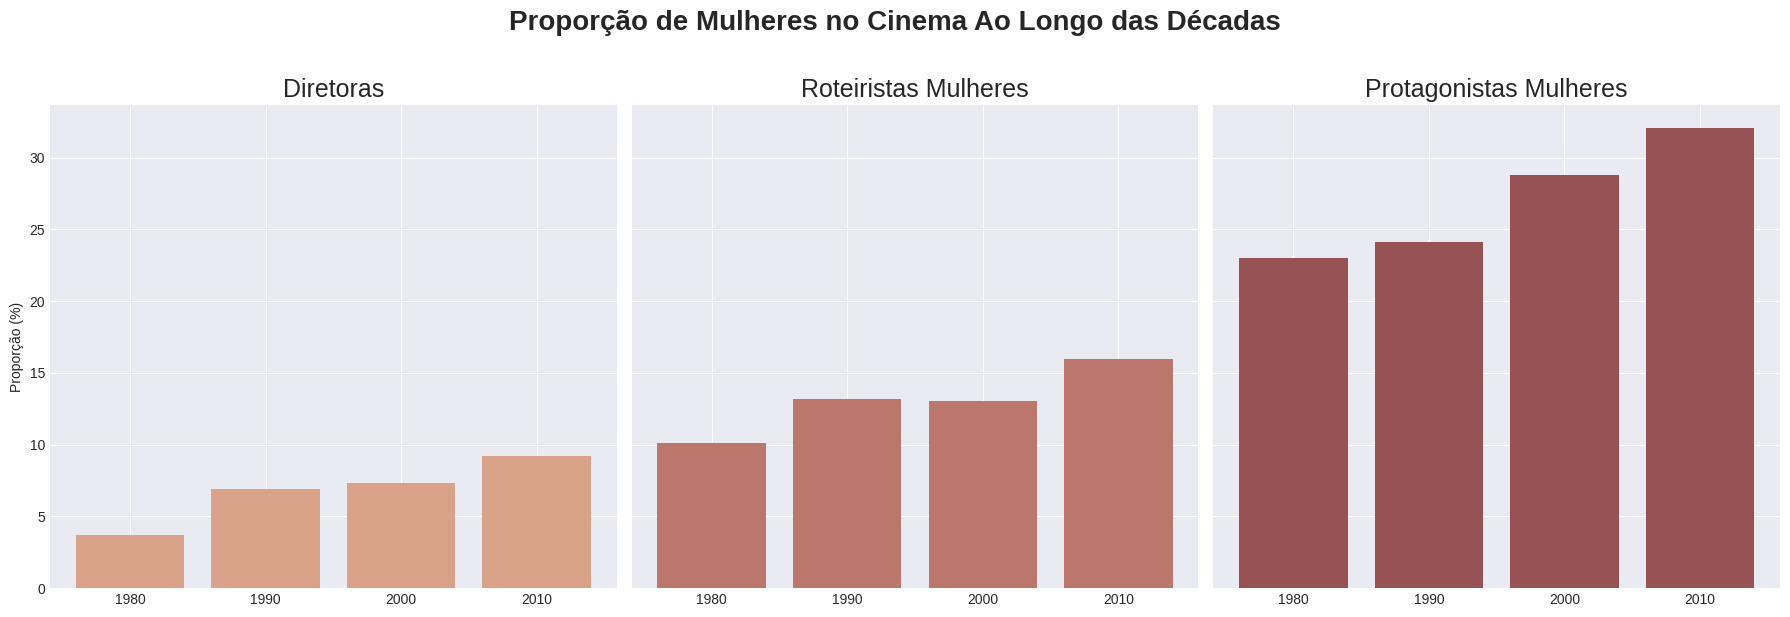

In [39]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


# Define os títulos e dados
titulos = [
    'Diretoras',
    'Roteiristas Mulheres',
    'Protagonistas Mulheres'
]
dados = [proporcao_diretoras, proporcao_roteiristas, proporcao_protagonistas]
cores = [paleta[3], paleta[2], paleta[1]]


# Gera os gráficos em cada ax
for i, (ax, titulo, dado, cor) in enumerate(zip(axs, titulos, dados, cores)):
    ax.bar(dado.index.astype(str), dado.values, color=cor)
    ax.set_title(titulo, fontdict={'weight': 'normal', 'family': 'Liberation Sans', 'size': 18})
    ax.set_xlabel('')

    if i == 0:
        ax.set_ylabel('Proporção (%)')
    else:
        ax.set_ylabel('')


# Define título

plt.suptitle(
    "Proporção de Mulheres no Cinema Ao Longo das Décadas",
    weight=param_titulo['weight'],
    size=20,
    family=param_titulo['family'],
    y = 1.02
)

plt.tight_layout()
plt.show()

A análise temporal revela um avanço gradual na presença feminina em cargos importantes do cinema popular. Esse aumento pode refletir transformações na indústria ou demanda maior por obras feitas por mulheres.

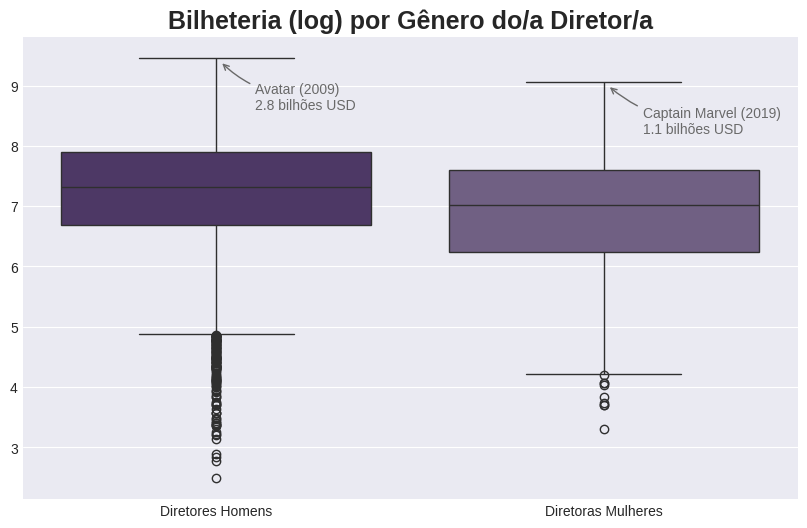

In [85]:
plt.figure(figsize=(10, 6))

sns.boxplot(df,
            x='genero_diretor',
            y=df['bilheteria_log'],
            palette=paleta[6:])

# Calcula maiores bilheterias e cria anotações
max_bilheteria = df.loc[df['bilheteria'].idxmax()]
max_bilheteria_f = filmes_com_diretoras_mulheres.loc[filmes_com_diretoras_mulheres['bilheteria'].idxmax()]

plt.annotate(f"{max_bilheteria['filme']} ({max_bilheteria['ano']})\n{(max_bilheteria['bilheteria'] / 1_000_000_000).round(1)} bilhões USD",
             xy=(0.01, 9.4),
             xytext=(0.1, 8.6),
             fontsize=10,
             color = 'dimgrey',
             arrowprops=dict(color='dimgrey',
                             linewidth=1,
                             arrowstyle = '->',
                             connectionstyle='arc3,rad=-0.2')
)

plt.annotate(f"{max_bilheteria_f['filme']} ({max_bilheteria_f['ano']})\n{(max_bilheteria_f['bilheteria'] / 1_000_000_000).round(1)} bilhões USD",
             xy=(1.01, max_bilheteria_f['bilheteria_log'] - 0.05),
             xytext=(1.1, 8.2),
             fontsize=10,
             color = 'dimgrey',
             arrowprops=dict(color='dimgrey',
                             linewidth=1,
                             arrowstyle='->',
                             connectionstyle='arc3,rad=-0.2')
)


plt.title('Bilheteria (log) por Gênero do/a Diretor/a',
          fontdict=param_titulo)
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['Diretores Homens', 'Diretoras Mulheres'])
plt.show()

O boxplot revela que filmes dirigidos por homens tendem a alcançar bilheteria ligeiramente maior que os filmes dirigidos por mulheres.

In [41]:
# Agrupa por gênero do diretor e calcula estatísticas descritivas para bilheteria
stats_bilheteria = df.groupby('genero_diretor')['bilheteria'].describe()

# Traduz os rótulos
stats_bilheteria = stats_bilheteria.rename(index={'M': 'Diretores Homens', 'F': 'Diretoras Mulheres'})

stats_bilheteria = stats_bilheteria.round(2).astype(str)
stats_bilheteria

,count,mean,std,min,25%,50%,75%,max
genero_diretor,,,,,,,,
Diretoras Mulheres,515.0,44702108.73,107988797.1,2037.0,1770339.0,10578643.0,40091415.0,1128462972.0
Diretores Homens,6918.0,80888277.24,169045483.36,309.0,4876380.75,21085655.5,78901849.25,2847246203.0


As estatísticas revelam ainda mais essa desigualdade. Enquanto a mediana de bilheteria para filmes com direção masculina é de aproximadamente 21 milhões de dólares, esse dado para direção feminina é de cerca de 10,5 milhões. A média também reflete essa diferença: 80,9 milhões para homens contra 44,7 milhões para mulheres. Além disso, os valores máximos atingem 2,8 bilhões nos filmes dirigidos por homens, mais que o dobro do máximo observado entre as diretoras.

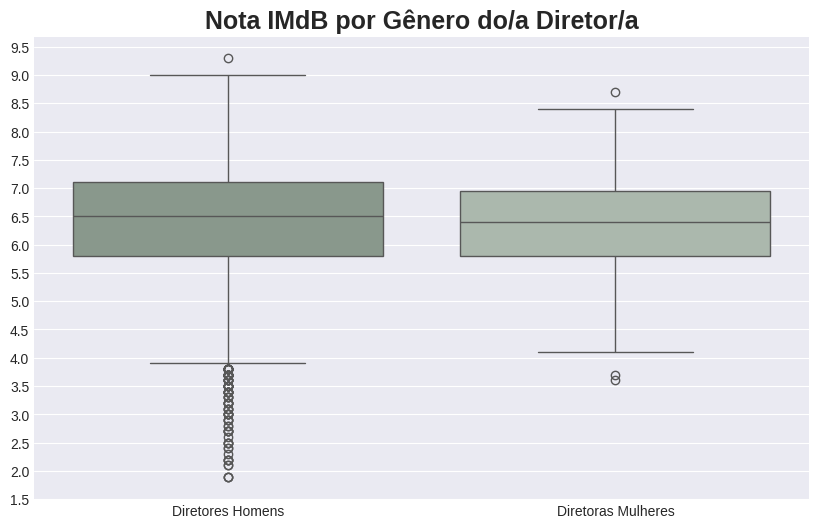

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(df,
            x='genero_diretor',
            y='nota_imdb',
            palette=paleta[4:])

plt.title('Nota IMdB por Gênero do/a Diretor/a',
          fontdict=param_titulo)
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['Diretores Homens', 'Diretoras Mulheres'])
plt.yticks(np.arange(1.5, 10, 0.5))
plt.show()

O boxplot acima representa as notas do IMdB de filmes segmentado pelo gênero no diretor. O resultado é bem relevante: não há diferença tão relevante entre os dois grupos. Isso indica que, apesar da sub-representação de mulheres na direção, filmes dirigidos por mulheres recebem, em média, notas tão positivas quanto aqueles dirigidos por homens.

In [43]:
df_homens_diretores = df[df['genero_diretor'] == 'M']
df_mulheres_diretoras = df[df['genero_diretor'] == 'F']

# Conta a distribuição de gêneros de filmes para cada grupo
generos_diretores_homens = df_homens_diretores['genero_filme'].value_counts(normalize=True).head(5).apply(lambda x: f"{x:.2%}")
generos_diretoras_mulheres = df_mulheres_diretoras['genero_filme'].value_counts(normalize=True).head(5).apply(lambda x: f"{x:.2%}")

print("Distribuição de Gêneros de Filmes")

print("\nDiretores Homens:")
print(generos_diretores_homens.to_string(header = False))
print("\nDiretoras Mulheres:")
print(generos_diretoras_mulheres.to_string(header = False))


Distribuição de Gêneros de Filmes

Diretores Homens:
Comédia     28.62%
Ação        23.39%
Drama       18.86%
Crime        7.41%
Aventura     5.75%

Diretoras Mulheres:
Comédia      39.09%
Drama        32.83%
Biografia     8.35%
Ação          7.21%
Crime         4.74%


A análise revela que, entre os filmes dirigidos por homens, os gêneros mais frequentes são comédia, ação e drama. Já entre os filmes dirigidos por mulheres, comédia e drama continuam predominando, mas o gênero ação aparece com frequência significativamente menor.

Esse padrão indica uma possível desigualdade de oportunidades por gênero, na qual diretoras são menos presentes em gêneros tradicionalmente associados ao público masculino.

<Figure size 800x400 with 0 Axes>

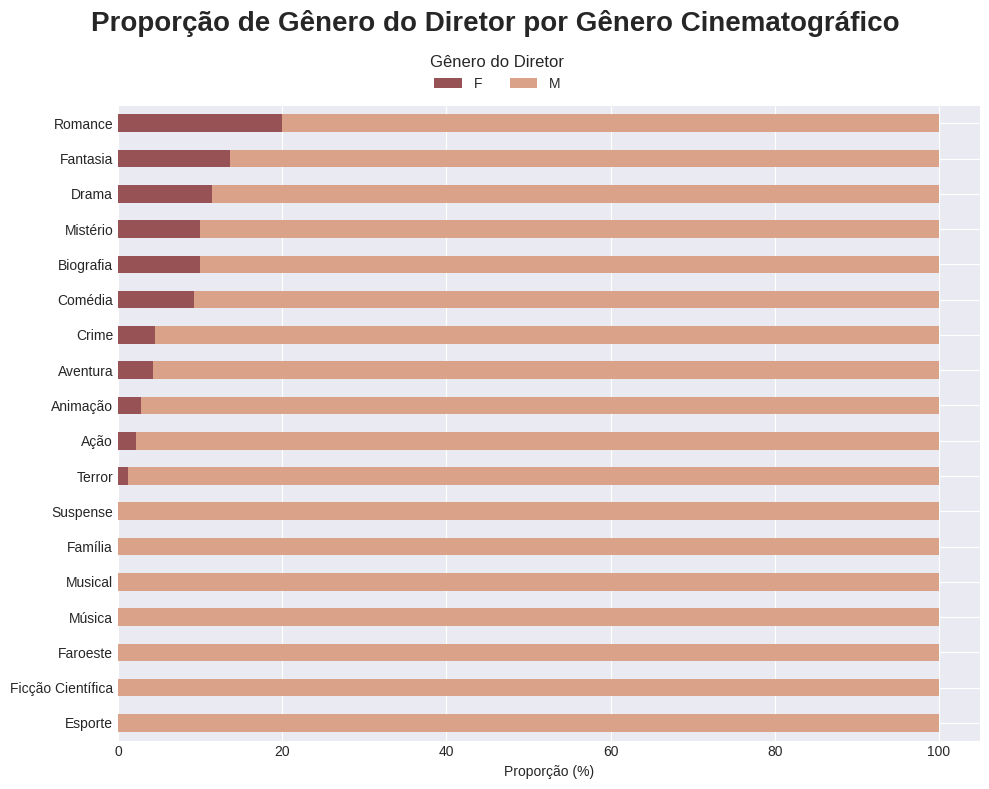

In [44]:
plt.figure(figsize=(8,4))

# Cria tabela cruzada
tabela_genero_diretor_por_genero_filme = pd.crosstab(df['genero_filme'], df['genero_diretor'], normalize='index') * 100
tabela_genero_diretor_por_genero_filme = tabela_genero_diretor_por_genero_filme.sort_values('F')

# Cria gráfico de barras empilhadas
tabela_genero_diretor_por_genero_filme[['F', 'M']].plot(
    kind='barh',
    stacked=True,
    figsize=(10, 8),
    color=[paleta[1], paleta[3]])

plt.suptitle('Proporção de Gênero do Diretor por Gênero Cinematográfico',
             weight=param_titulo['weight'],
              size=20,
              family=param_titulo['family'])
plt.xlabel('Proporção (%)')
plt.ylabel('')
plt.legend(title = 'Gênero do Diretor',
           loc = 'upper center',
           bbox_to_anchor = (0.44, 1.1),
           ncol = 2,
           title_fontsize = 'large')

plt.tight_layout()
plt.show()

O gráfico mostra a proporção de gênero do/a diretor/a em cada gênero cinematográfico. Observa-se que a direção masculina é predominante em todas as categorias, porém os gêneros romance, fantasia e drama são os que tem maior presença relativa de diretoras mulheres. Enquanto isso, gêneros como ação, terror, suspense e ficção científica são quase exclusivamente dirigidos por homens. Esses padrões sugerem uma segmentação onde mulheres alcançam mais oportunidades em gêneros considerados "emocionais" ou "sensíveis".

# Transformação de dados

A última etapa do pré-processamento antes da modelagem é a transformação dos dados. Nessa fase, ajustamos os dados para que fiquem em um formato que seja compreensível para o computador.

### Particionamento de dados treino e teste

Antes de aplicar técnicas de transformação de dados, é essencial dividir os dados em conjuntos de treino e teste. Essa separação deve ser feita primeiro para evitar problemas de vazamento de dados (*data leakage*) que ocorre quando algum conhecimento sobre o conjunto de teste vaza para o conjunto usado para treinar o modelo, o que pode levar a estimativas irreais e otimistas.

In [45]:
# Cria uma variável binária para indicar se o filme tem diretora mulher

df['direcao_feminina'] = (df['genero_diretor'] == 'F').astype(int)

In [46]:
# Cria variável explicativa (X) e variável alvo (y)

X = df[['genero_filme', 'nota_imdb']]
y = df['direcao_feminina']

In [47]:
# Separa dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Aqui dividimos os dados em treino e teste, reservando 20% para teste. Usamos o método de estratificação para garantir que a proporção de filmes dirigidas por homens e mulheres seja balanceada em ambas as amostras.

In [48]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (6088, 2)
Dimensões de X_test: (1522, 2)
Dimensões de y_train: (6088,)
Dimensões de y_test: (1522,)


### One-Hot Encoding

One-Hot Encoding é uma técnica aplicável a variáveis categóricas nominais, ou seja, aquelas que não têm uma ordem definida. O que ela faz é transformar cada categoria em uma nova coluna binária, indicando com 0 ou 1 a presença daquele valor em cada linha do dataset.

In [49]:
# Cria o codificador que retorna um dataframe

ohe = OneHotEncoder(sparse_output=False)
ohe.set_output(transform="pandas")

OneHotEncoder(sparse_output=False)

In [50]:
# Aplica nos dados de treino

X_train_encoded = ohe.fit_transform(X_train[['genero_filme']])
X_test_encoded = ohe.transform(X_test[['genero_filme']])

In [51]:
print(X_train_encoded.head(5))

      genero_filme_Animação  genero_filme_Aventura  genero_filme_Ação  \
3571                    0.0                    0.0                0.0   
6955                    1.0                    0.0                0.0   
3496                    0.0                    0.0                0.0   
2579                    0.0                    0.0                0.0   
6362                    0.0                    0.0                0.0   

      genero_filme_Biografia  genero_filme_Comédia  genero_filme_Crime  \
3571                     0.0                   1.0                 0.0   
6955                     0.0                   0.0                 0.0   
3496                     0.0                   0.0                 1.0   
2579                     0.0                   0.0                 1.0   
6362                     0.0                   0.0                 0.0   

      genero_filme_Drama  genero_filme_Esporte  genero_filme_Família  \
3571                 0.0                   0

### Padronização

A padronização redimensiona um ou mais atributos numéricos para que eles tenham as mesmas propriedades de uma distribuição normal padrão (média igual a 0 e desvio padrão 1).

Essa técnica é mais eficaz se os dados já seguirem uma distribuição aproximadamente normal, o que é o caso da variável *nota_imdb*, que possui média próxima à mediana e distribuição razoavelmente simétrica.

In [52]:
scaler = StandardScaler()

X_train_encoded['nota_imdb_padronizada'] = scaler.fit_transform(X_train[['nota_imdb']])
X_test_encoded['nota_imdb_padronizada'] = scaler.transform(X_test[['nota_imdb']])

In [53]:
print(X_train_encoded['nota_imdb_padronizada'].head(5))

3571   -0.406284
6955    0.420683
3496    0.007199
2579   -0.096172
6362    0.110570
Name: nota_imdb_padronizada, dtype: float64


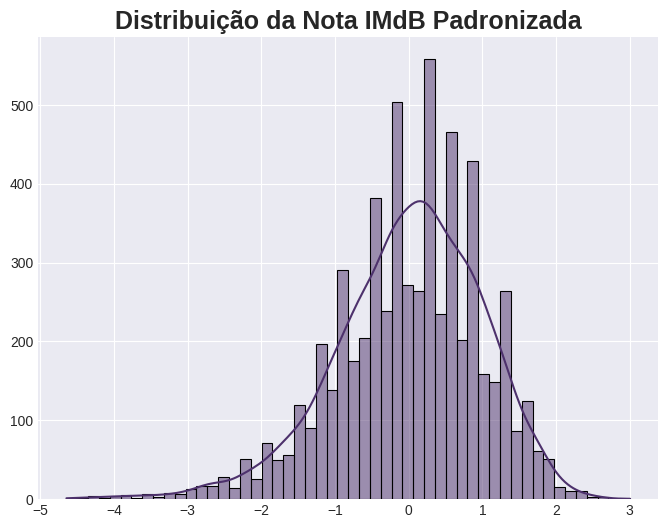

In [54]:
plt.figure(figsize=(8, 6))

sns.histplot(X_train_encoded['nota_imdb_padronizada'],
             kde=True,
             color = paleta[6])

plt.title('Distribuição da Nota IMdB Padronizada',
          fontdict = param_titulo)
plt.xlabel('')
plt.ylabel('')
plt.show()

#Conclusão

A análise confirma que há uma desigualdade de gênero evidente em cargos importantes na indústria do cinema, especialmente na direção e no roteiro. Apesar de haver uma melhoria gradual ao longo do tempo, a diferença permanece grande, até mesmo na segmentação por gênero cinematográfico.

Concluímos que não existe forte correlação entre a nota do IMdB e a bilheteria do filme. Ou seja, a popularidade comercial de um filme não indica necessariamente que ele será bem avaliado e vice-versa.

Não foram observadas diferenças notáveis nas avaliações dos filmes de acordo com o gênero do/a diretor/a. Isso evidencia que essa desigualdade não é relacionada à incompetência das mulheres de produzir boas obras, mas sim de um problema estrutural que as afasta de oportunidades de liderança.

No entanto, confirmamos que os filmes dirigidos por homens tendem a atingir maiores bilheterias. Esse resultado pode indicar que diretoras mulheres não têm as mesmas oportunidades de dirigir filmes com maior orçamento e apelo comercial. Vimos como os filmes de ação, frequentemente vinculados a orçamentos altos e maior bilheteria, são quase exclusivamente dirigidos por homens.

O trabalho reforça a importância de políticas de inclusão no audiovisual para promover a equidade de gênero e, consequentemente, aumentar a pluralidade de narrativas.